<a href="https://colab.research.google.com/github/vavana619/quant_machine/blob/main/%5B5%EC%9E%A5%5D_%EA%B0%80%EC%B9%98%EC%A3%BC%EB%A5%BC_%EC%B0%BE%EB%8A%94_%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 재무 데이터 산출 기준
: 1년에 한 번 연간 실적을 발표하는 사업보고서(Annual report)와 분기별로 3개월치 실적을 발표하는 분기보고서(Quarterly report)

* *연간 데이터* : 사업보고서에서 추출한 데이터로 만든 것
  * 데이터 가공이 용이해 편함 BUT 1년에 한 번만 매매를 하게 되어 대응이 늦어짐 (단점)
  * 미국은 결산 시기가 제각각(한국은 대부분 12월에 결산) → 미국 주식에 투자할 때는 연간 데이터의 효용이 떨어짐
* *분기 데이터* : 분기보고서에서 나온 것
  * 3개월마다 발표 → 가장 빈번하게 나오는 투자 정보
  * 바로 투자에 이용하기엔 무리가 있음
  * 계절효과를 감안하지 않고 이용하면 데이터를 이해함에 있어 착오가 생길 수 있음
* *트레일링(Trailing) 데이터*
  * 연간 데이터와 분기 데이터의 **한계**를 극복
  *  *4개 분기만큼의 이동합계*를 구해서 만들기 → 매 분기를 기준으로 1년간의 분기 데이터를 합쳐 연간 데이터를 만들어낸 것
  * 비교 대상이 동일해질 뿐 아니라, 계절효과도 제거할 수 있음

# 2. 가치주란?

* 좋은 주식 X, 싼 주식 X → 기업의 *실제 가치에 비해 낮은 가격에 거래*되는 주식, 기업의 실제 가치를 구해야 함
* **밸류에이션(Valuation)** : 가치평가에 대한 내용
  * *상대가치법*
    * **대상 종목을 유사한 다른 종목의 주가와 비교**하여 산출하는 방법
    * PER, PBR, PSR, PCR 등이 유명하며 특성에 따라 EV/EBITDA, EV(Enterprise Value)/Sales 등도 사용
  * *절대가치법*
    * 다른 종목과 상관없이 **대상 종목 자체의 수치만 놓고** 구함
    * **RIM(Residual Income Model)** : 재무제표만으로 간단히 할 수 있는 방식


## [주가, 자본, 이익 관계 내의 가치주 지표 산출]
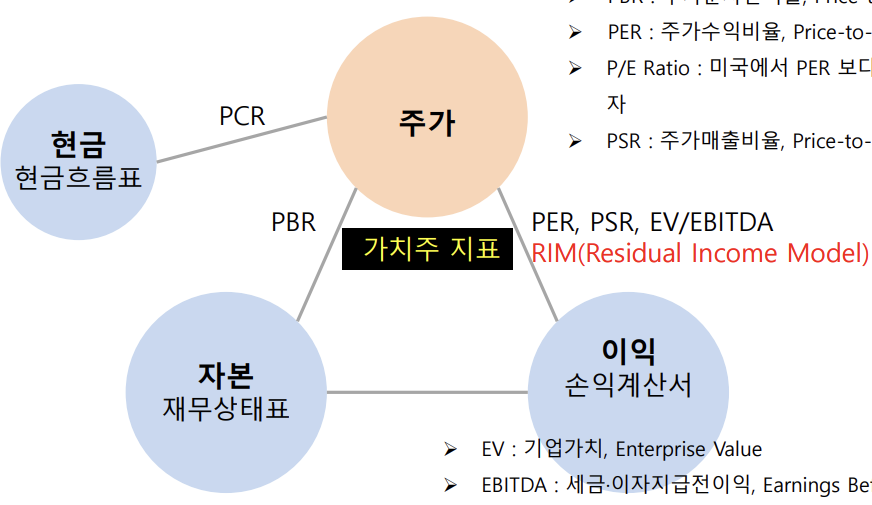


 * *PCR* : 주가*현금흐름*비율, Price-to-Cash Flow Ratio
 * *PBR*: 주가*순자산*비율, Price-to-Book Ratio
 * *PER*: 주가*수익*비율, Price-to-Earning Ratio
 * *P/E Ratio* : 미국에서 PER보다 많이 사용하는 약자
 * *PSR* : 주가*매출*비율, Price-to-Sales Ratio
 * *ER* : 기업가치, Enterprise Value
 * *EBITDA* : 세금, 이자지급전이익, Earnings Before Interest, Taxes, Depreciation(감가상각) and Amortization(부채상환)


## 1) 이익 대비 저평가 종목, PER(Price to Earning Ratio: 주가수익비율)
* **이익에 대해 시장이 매기는 가치**
* 기업가치 = 기업을 사는데 필요한 돈 -> 시가총액(주가x주식수)
* **주식투자 비용을 회수하는데 걸리는 시간**

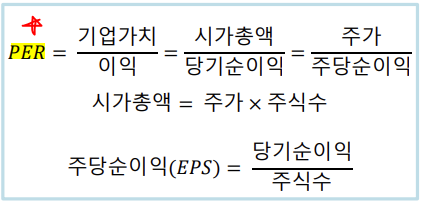

### [PER(주가수익비율) 지표 산출]

#### 1) 코스트코(Cost)의 재무제표 불러오기

## `fn_single(otp, symbol, window)`


* otp : OTP 코드 값
* symbol : 종목코드
* window : 데이터 산출 기준
  * 재무제표 데이터를 읽을 때에는 산출 기준이 매우 중요함
  * 분기 데이터 가져오기 → **window='Q'**
  * 분기 데이터를 *합쳐서 1년 치로 만든 트레일링 데이터* 가져오기 →  **window='T'**

In [1]:
pip install finterstellar

     |████████████████████████████████| 109 kB 5.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import finterstellar as fs
otp = '16499185281189711897'

In [4]:
df = fs.fn_single(otp, symbol='COST', window='T')
df.tail(3)

,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,Shares,...,Long Term Liabilities,Total Liabilities,Shareholders Equity,Depreciation,Operating Cash Flow,Capital Expenditure,Investing cash flow,Dividends,Financing cash flow,Price
2021-08-31,1.979980e+11,1.726410e+11,2.535700e+10,1.804900e+10,5.278000e+09,5.061000e+09,11.40,9.300000e+09,5.278000e+09,443000000.0,...,1.174900e+10,4.119000e+10,1.756400e+10,2.002000e+09,9.644000e+09,-2.695000e+09,-4.196000e+09,-5.438000e+09,-6.207000e+09,455.49
2021-11-30,2.035920e+11,1.775150e+11,2.607700e+10,1.867100e+10,5.631000e+09,5.434000e+09,12.24,9.425000e+09,5.631000e+09,443000000.0,...,1.180700e+10,4.514900e+10,1.846300e+10,2.029000e+09,1.286400e+10,-3.177000e+09,-4.753000e+09,-1.358000e+09,-2.396000e+09,539.38
2022-02-28,2.102190e+11,1.836170e+11,2.660200e+10,1.911400e+10,7.443000e+09,5.513000e+09,12.41,9.549000e+09,7.443000e+09,444000000.0,...,1.155700e+10,4.310200e+10,1.941800e+10,2.071000e+09,9.932000e+09,-3.900000e+09,-3.891000e+09,-1.358000e+09,-2.805000e+09,519.25


In [5]:
df.columns # 가져온 데이터 확인 -> PER 계산에 필요한 Price(주가)와 EPS(주당순이익) 값을 이용

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

#### 2) PER를 계산하고 코스트코의 PER 추이를 차트로 그려보기
: *PER = Price / EPS* 공식대로 계산

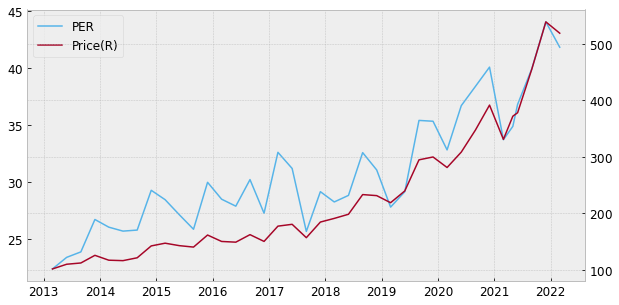

In [6]:
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='Price')

-> 주가흐름의 추이와 PER의 추이가 왠지 비슷해 보임

#### 3) 밴드차트 그리기
* PER과 같이 *재무지표와 가격이 결합*된 지표 -> 주가배수(Price Multiple), 프라이스멀티플, 멀티플이라고 부름
* **주가 = PER x EPS(주당순이익)**로 그리는 것으로 *멀티플 변동을 한눈에 파악*할 수 있음

## `draw_price_multiple_band(df, multiple, acct)`


* multiple : 프라이스멀티플 이름
* acct : 계산에 필요한 컬럼

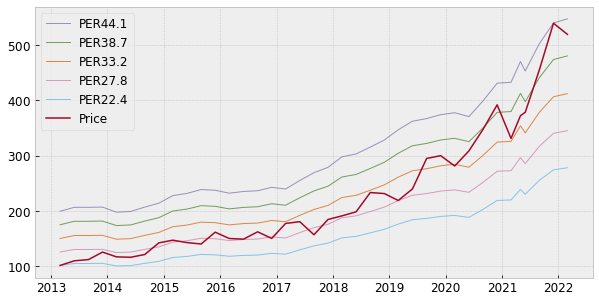

In [7]:
fs.draw_price_multiple_band(df, multiple='PER', acct='EPS')

-> 보라색 선은 PER이 40일때 주가, 맨 아래 하늘색 선은 PER이 22일 때의 주가를 나타냄, 빨간색은 주가

 * PER이 과거에 비해 지금 어느 정도 수준에 있는지, 과거엔 어땠는지 한눈에 보임 -> *저평가 종목*을 골라내는데 유용한 도구 (지난 10년 대비 현재는 PER이 꽤 높은 수준)
 * *PER이 낮을수록 이익 대비 저평가*된 종목 -> **가치주**
